# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [2]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
# 데이터셋의 Unnamed:0 열 삭제
data.drop('Unnamed: 0',inplace=True,axis=1)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
# EDA

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [5]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [6]:
# 결측치 수가 비교적 적은 Mileage, Engine, Power, Seats는 결측치를 평균값으로 대체하는 것이 좋을 것 같음
# 결측치수가 많은 New_Price는 결측치를 제거

In [7]:
data = data.dropna(subset=['New_Price'])
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              1
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [8]:
#New_Price 결측치 제거 후 Mileage의 결측치 1개만 남으므로 이것 또한 제거

In [9]:
data = data.dropna(subset=['Mileage'])
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [10]:
data.head(50)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,10.65 Lakh,9.95
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,32.01 Lakh,15.00
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,47.87 Lakh,18.55
28,Honda WRV i-VTEC VX,Kochi,2018,37430,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,10.57 Lakh,9.90
34,Volkswagen Vento 1.6 Highline,Coimbatore,2014,55431,Petrol,Manual,Second,16.09 kmpl,1598 CC,103.5 bhp,5.0,12.33 Lakh,6.98
36,Maruti Vitara Brezza ZDi Plus,Kochi,2018,50075,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,11.12 Lakh,8.63
44,Hyundai Elantra 2.0 SX Option AT,Bangalore,2014,46374,Petrol,Automatic,First,14.62 kmpl,1999 CC,149.92 bhp,5.0,23.64 Lakh,8.85
47,Toyota Innova Crysta 2.7 GX MT,Bangalore,2012,70704,Petrol,Manual,First,11.25 kmpl,2694 CC,163.7 bhp,7.0,18.64 Lakh,10.95


In [11]:
# 데이터 내의 단위 제거
data['Engine'] = data['Engine'].str.replace(" CC","")
data['Power'] = data['Power'].str.replace(" bhp","")
data['Mileage'] = data['Mileage'].str.replace(" kmpl","")
data['New_Price'] = data['New_Price'].str.replace(" Lakh","")
data['Mileage'] = data['Mileage'].str.replace(" km/kg","")
data['New_Price'] = data['New_Price'].str.replace(" Cr","")

In [12]:
data['Mileage'] = pd.to_numeric(data['Mileage'])
data['Engine'] = pd.to_numeric(data['Engine'])
data['Power'] = pd.to_numeric(data['Power'])
data['New_Price'] = pd.to_numeric(data['New_Price'])

In [13]:
#Name에서 자동차 업체만 뽑기
data["Name"] = data["Name"].str.split().str[0]

In [14]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,8.61,4.50
7,Toyota,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755,171.50,8.0,21.00,17.50
10,Maruti,Kochi,2018,25692,Petrol,Manual,First,21.56,1462,103.25,5.0,10.65,9.95
15,Mitsubishi,Delhi,2014,110000,Diesel,Manual,First,13.50,2477,175.56,7.0,32.01,15.00
20,BMW,Kochi,2014,32982,Diesel,Automatic,First,22.69,1995,190.00,5.0,47.87,18.55


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 823 entries, 2 to 6014
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               823 non-null    object 
 1   Location           823 non-null    object 
 2   Year               823 non-null    int64  
 3   Kilometers_Driven  823 non-null    int64  
 4   Fuel_Type          823 non-null    object 
 5   Transmission       823 non-null    object 
 6   Owner_Type         823 non-null    object 
 7   Mileage            823 non-null    float64
 8   Engine             823 non-null    int64  
 9   Power              823 non-null    float64
 10  Seats              823 non-null    float64
 11  New_Price          823 non-null    float64
 12  Price              823 non-null    float64
dtypes: float64(5), int64(3), object(5)
memory usage: 90.0+ KB


### 정규성 판단

<AxesSubplot:>

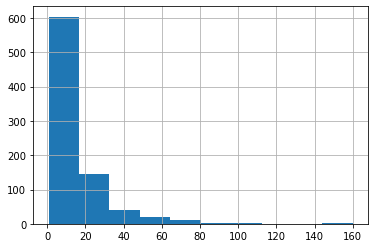

In [16]:
data['Price'].hist() 

In [17]:
# 위의 그래프가 치우친 형태여서 log 변환 수행

data['logprice'] = np.log(data['Price'])

<AxesSubplot:>

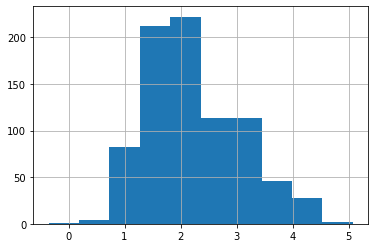

In [18]:
data['logprice'].hist()

<AxesSubplot:>

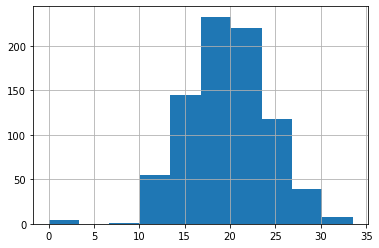

In [19]:
data['Mileage'].hist()

<AxesSubplot:>

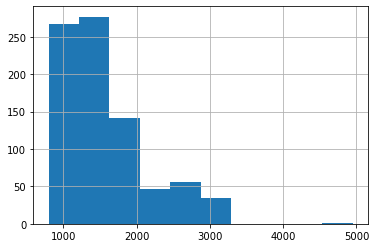

In [20]:
data['Engine'].hist()

<AxesSubplot:>

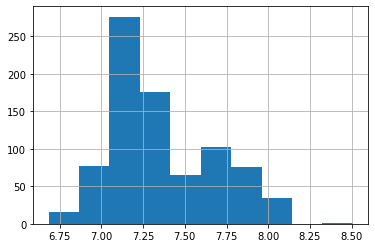

In [21]:
#Engine log 변환
data['logEngine'] = np.log(data['Engine'])
data['logEngine'].hist()

<AxesSubplot:>

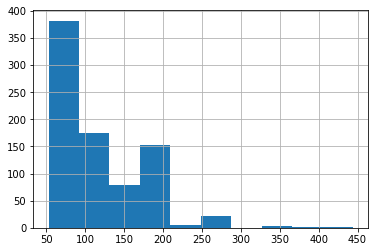

In [22]:
data['Power'].hist()

<AxesSubplot:>

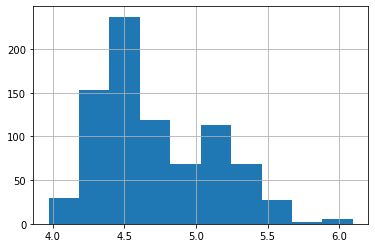

In [23]:
#Power log 변환
data['logPower'] = np.log(data['Power'])
data['logPower'].hist()

<AxesSubplot:>

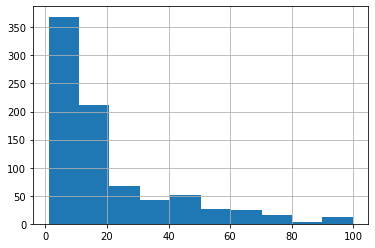

In [24]:
data['New_Price'].hist()

<AxesSubplot:>

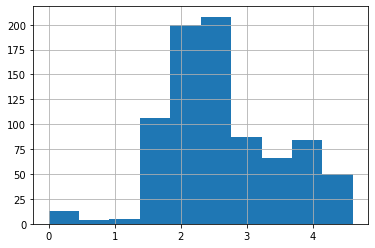

In [25]:
#New_Price log 변환
data['logNew_Price'] = np.log(data['New_Price'])
data['logNew_Price'].hist()

<AxesSubplot:>

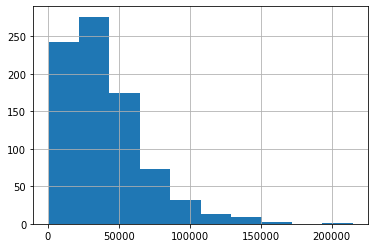

In [26]:
data['Kilometers_Driven'].hist()

<AxesSubplot:>

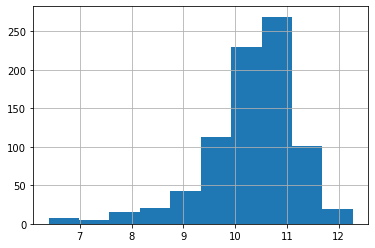

In [27]:
#New_Price log 변환
data['logKilometers_Driven'] = np.log(data['Kilometers_Driven'])
data['logKilometers_Driven'].hist()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 823 entries, 2 to 6014
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  823 non-null    object 
 1   Location              823 non-null    object 
 2   Year                  823 non-null    int64  
 3   Kilometers_Driven     823 non-null    int64  
 4   Fuel_Type             823 non-null    object 
 5   Transmission          823 non-null    object 
 6   Owner_Type            823 non-null    object 
 7   Mileage               823 non-null    float64
 8   Engine                823 non-null    int64  
 9   Power                 823 non-null    float64
 10  Seats                 823 non-null    float64
 11  New_Price             823 non-null    float64
 12  Price                 823 non-null    float64
 13  logprice              823 non-null    float64
 14  logEngine             823 non-null    float64
 15  logPower              

In [29]:
data_log = data.drop(['Kilometers_Driven','New_Price','Power','Engine','Price'],axis=1)

In [30]:
data_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 823 entries, 2 to 6014
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  823 non-null    object 
 1   Location              823 non-null    object 
 2   Year                  823 non-null    int64  
 3   Fuel_Type             823 non-null    object 
 4   Transmission          823 non-null    object 
 5   Owner_Type            823 non-null    object 
 6   Mileage               823 non-null    float64
 7   Seats                 823 non-null    float64
 8   logprice              823 non-null    float64
 9   logEngine             823 non-null    float64
 10  logPower              823 non-null    float64
 11  logNew_Price          823 non-null    float64
 12  logKilometers_Driven  823 non-null    float64
dtypes: float64(7), int64(1), object(5)
memory usage: 90.0+ KB


## 범주형 변수 dummy 변환

In [31]:
data_log.head()

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,logprice,logEngine,logPower,logNew_Price,logKilometers_Driven
2,Honda,Chennai,2011,Petrol,Manual,First,18.20,5.0,1.504077,7.089243,4.485260,2.152924,10.736397
7,Toyota,Mumbai,2016,Diesel,Automatic,First,11.36,8.0,2.862201,7.921173,5.144583,3.044522,10.491274
10,Maruti,Kochi,2018,Petrol,Manual,First,21.56,5.0,2.297573,7.287561,4.637153,2.365560,10.153935
15,Mitsubishi,Delhi,2014,Diesel,Manual,First,13.50,7.0,2.708050,7.814803,5.167981,3.466048,11.608236
20,BMW,Kochi,2014,Diesel,Automatic,First,22.69,5.0,2.920470,7.598399,5.247024,3.868489,10.403717


In [32]:
data['Name'].unique()

array(['Honda', 'Toyota', 'Maruti', 'Mitsubishi', 'BMW', 'Volkswagen',
       'Hyundai', 'Mercedes-Benz', 'Nissan', 'Tata', 'Datsun', 'Audi',
       'Mahindra', 'Skoda', 'Mini', 'Jaguar', 'Jeep', 'Ford', 'Renault',
       'Land', 'Volvo', 'Fiat', 'Isuzu', 'Porsche'], dtype=object)

In [33]:
data['Location'].unique()

array(['Chennai', 'Mumbai', 'Kochi', 'Delhi', 'Coimbatore', 'Bangalore',
       'Pune', 'Ahmedabad', 'Kolkata', 'Hyderabad', 'Jaipur'],
      dtype=object)

In [34]:
#더미 변환 (pd.get_dummies)

data = pd.get_dummies(data, columns=['Name'])
data = pd.get_dummies(data, columns=['Location'])
data = pd.get_dummies(data, columns=['Fuel_Type'])
data = pd.get_dummies(data, columns=['Transmission'])
data = pd.get_dummies(data, columns=['Owner_Type'])

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 823 entries, 2 to 6014
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    823 non-null    int64  
 1   Kilometers_Driven       823 non-null    int64  
 2   Mileage                 823 non-null    float64
 3   Engine                  823 non-null    int64  
 4   Power                   823 non-null    float64
 5   Seats                   823 non-null    float64
 6   New_Price               823 non-null    float64
 7   Price                   823 non-null    float64
 8   logprice                823 non-null    float64
 9   logEngine               823 non-null    float64
 10  logPower                823 non-null    float64
 11  logNew_Price            823 non-null    float64
 12  logKilometers_Driven    823 non-null    float64
 13  Name_Audi               823 non-null    uint8  
 14  Name_BMW                823 non-null    u

## 회귀모델 생성

In [36]:
#test 데이터 생성
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=10)

In [37]:
train_y = train['Price']

In [38]:
test_y = test['Price']

In [39]:
train_x = train.drop(columns=['Price','logprice'])

In [40]:
test_x = test.drop(columns=['Price','logprice'])

In [41]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 658 entries, 714 to 1991
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    658 non-null    int64  
 1   Kilometers_Driven       658 non-null    int64  
 2   Mileage                 658 non-null    float64
 3   Engine                  658 non-null    int64  
 4   Power                   658 non-null    float64
 5   Seats                   658 non-null    float64
 6   New_Price               658 non-null    float64
 7   logEngine               658 non-null    float64
 8   logPower                658 non-null    float64
 9   logNew_Price            658 non-null    float64
 10  logKilometers_Driven    658 non-null    float64
 11  Name_Audi               658 non-null    uint8  
 12  Name_BMW                658 non-null    uint8  
 13  Name_Datsun             658 non-null    uint8  
 14  Name_Fiat               658 non-null   

In [42]:
train_y

714      8.50
2178    41.60
555      6.75
69      10.50
573      6.00
        ...  
2648     8.00
2309    13.90
3836    41.50
919      8.65
1991    17.02
Name: Price, Length: 658, dtype: float64

In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_x, train_y)

pred = model.predict(train_x)

In [44]:
pred_test = model.predict(test_x)

In [45]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(train_y, pred)
test_mse = mean_squared_error(test_y,pred_test)

In [46]:
print("train_mse : ",train_mse, "& test_mse : ", test_mse)

train_mse :  30.366034829458 & test_mse :  15.777954593558846


### 규제 포함 (ridge, lasso)

1. lasso

In [47]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(train_x, train_y)

l_pred = lasso.predict(train_x)
l_pred_test = lasso.predict(test_x)

In [48]:
train_mse = mean_squared_error(train_y, l_pred)
test_mse = mean_squared_error(test_y,l_pred_test)

In [49]:
print("lasso_train_mse : ",train_mse, "& lasso_test_mse : ", test_mse)

lasso_train_mse :  30.714076910279815 & lasso_test_mse :  15.467195918329002


2. ridge


In [50]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 10)
ridge.fit(train_x, train_y)

r_pred = ridge.predict(train_x)
r_pred_test = ridge.predict(test_x)

In [51]:
train_mse = mean_squared_error(train_y, r_pred)
test_mse = mean_squared_error(test_y,r_pred_test)

In [52]:
print("ridge_train_mse : ",train_mse, "& ridge_test_mse : ", test_mse)

ridge_train_mse :  37.289573557948025 & ridge_test_mse :  19.036981437270896


규제를 실행했을 때, 성능이 크게 좋아질 줄 알았지만 lasso에서는 작은 차이로 성능 개선을 볼 수 있었고, ridge에서는 성능이 좋아졌다고 보기 어려웠다.